##### Just using this Jupyter Notebook to work some things out 

In [2]:
# Dependencies
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:

# <g></g>
# <script>d3.select("g").text("Project 2")</script>

## Pandas & Matplotlib

In [66]:
executions_df = pd.read_csv("data\data.csv")
executions_df.head()

,Date,Name,Age,Sex,Race,Crime,Victim Count,Victim Sex,Victim Race,County,State,Region,Method,Juvenile,Volunteer,Federal,Foreign National
0,01/17/1977,Gary Gilmore,36,Male,White,Murder,1,Male,White,Utah,UT,West,Firing Squad,No,Yes,No,No
1,05/25/1979,John Spenkelink,30,Male,White,Murder,1,Male,White,Leon,FL,South,Electrocution,No,No,No,No
2,10/22/1979,Jesse Bishop,46,Male,White,Murder,1,Male,White,Clark,NV,West,Gas Chamber,No,Yes,No,No
3,03/09/1981,Steven Judy,24,Male,White,Murder,4,"2 Male, 2 Female",White,Marion,IN,Midwest,Electrocution,No,Yes,No,No
4,08/10/1982,Frank Coppola,38,Male,White,Murder,1,Male,White,Newport News City,VA,South,Electrocution,No,Yes,No,No


In [6]:
executions_df.columns

Index(['Date', 'Name', 'Age', 'Sex', 'Race', 'Crime', 'Victim Count',
       'Victim Sex', 'Victim Race', 'County', 'State', 'Region', 'Method',
       'Juvenile', 'Volunteer', 'Federal', 'Foreign National'],
      dtype='object')

In [7]:
#Renaming columns: Removing spacing and changing to lowercase
executions_df = executions_df.rename(columns={'Date': 'date', 'Name':'name', 'Age':'age', 'Sex':'sex', 
                                              'Race':'race', 'Crime':'crime', 'Victim Count':'victim_count',
                                              'Victim Sex':'victim_sex', 'Victim Race':'victim_race', 
                                              'County':'county','State':'state', 'Region':'region', 'Method':'method',
                                              'Juvenile':'juvenile','Volunteer':'volunteer', 'Federal':'federal', 
                                              'Foreign National':'foreign_national'})

In [8]:
states = executions_df["state"].value_counts()
states_df = states.rename_axis('state').reset_index(name='total')
states_df.head()

,state,total
0,TX,538
1,OK,112
2,VA,111
3,FL,92
4,MO,87


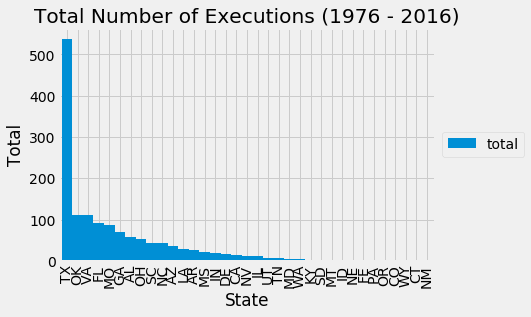

<Figure size 432x288 with 0 Axes>

In [9]:
plt.style.use("fivethirtyeight")

states_df.plot(kind="bar", x="state", width=1)

plt.title("Total Number of Executions (1976 - 2016)")
plt.ylabel("Total")
plt.xlabel("State")
plt.grid(True)

plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

# plt.savefig("#.png", bbox_inches="tight")

plt.show()
plt.tight_layout()

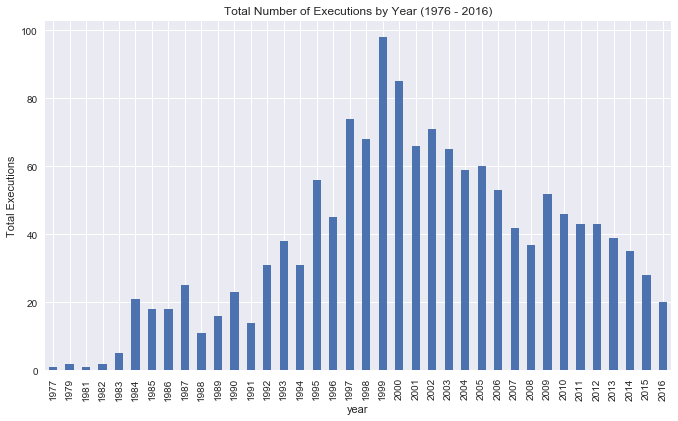

In [10]:
plt.style.use("seaborn")
executions_df['date'] = pd.to_datetime(executions_df['date'])
executions_df['year'] = executions_df['date'].map(lambda x: x.year)
yearly_ex = executions_df.groupby(['year'])['name'].count()
ax = yearly_ex.plot.bar(figsize=(10,6), title="Total Number of Executions by Year (1976 - 2016)")
label = plt.ylabel("Total Executions")
plt.show()

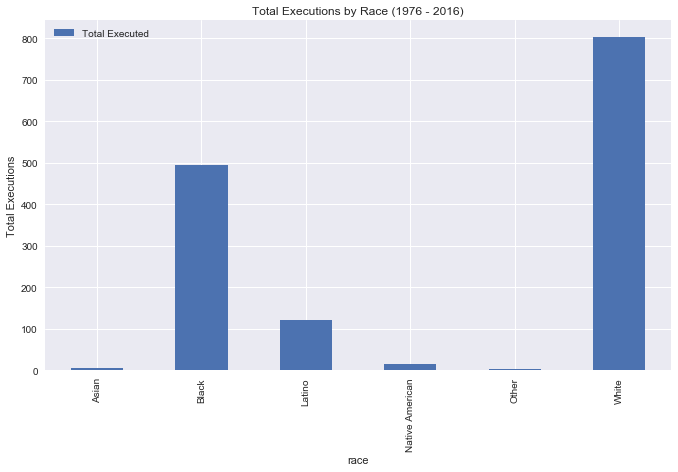

In [11]:
plt.style.use("seaborn")
race_ex = executions_df.groupby(['race'], as_index=False)['name'].count()
race_ex.rename(columns={'name':'Total Executed'}, inplace=True)
ax = race_ex.plot.bar(figsize=(10,6), x='race', y='Total Executed', title="Total Executions by Race (1976 - 2016)")
label = plt.ylabel("Total Executions")
plt.show()

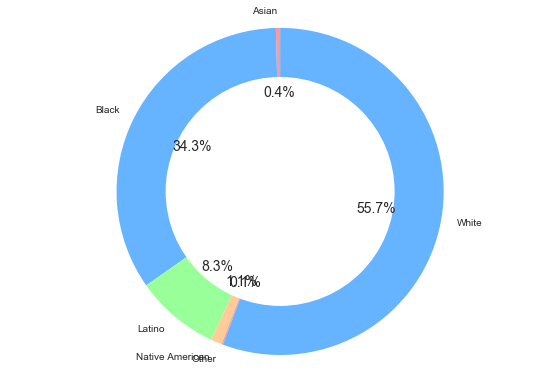

In [12]:
# Racial Breakdown of executions 
sizes = race_ex["Total Executed"]
labels= race_ex["race"]
#colors
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
 
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels,colors = colors, autopct='%1.1f%%', startangle=90)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
# # Save Figure
# # plt.savefig(".png")
plt.show()

## Plotly

In [13]:
#imports
import plotly
from plotly import __version__
print (__version__)
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
import chart_studio.plotly as py
import ipywidgets as widgets
# from scipy import special
import plotly.express as px
import plotly.offline as pyo

#Connecting notebook
plotly.offline.init_notebook_mode(connected=True)

4.1.0


In [14]:
ex = [go.Bar(x=states_df.state,
            y=states_df.total)]

plotly.offline.iplot(ex, filename='plotly-bar-ex')

In [16]:
yearly_db = pd.read_csv(file, parse_dates=['Date'])

In [22]:
print(plt.style.available)

['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', 'tableau-colorblind10', '_classic_test']


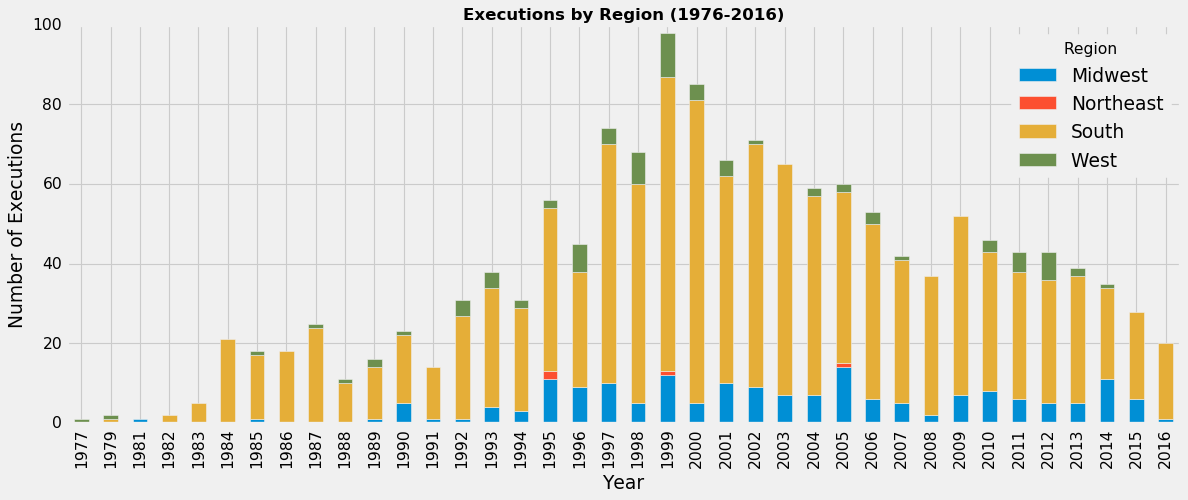

In [48]:
plt.style.use("fivethirtyeight")
fig, ax = plt.subplots(figsize=(16,6))
pd.pivot_table(yearly_db, index=[yearly_db.Date.dt.year, yearly_db.Region], aggfunc="size").unstack(
                                            level=1).plot(kind='bar', stacked=True, ax=ax)
ax.set_title("Executions by Region (1976-2016)", fontweight='bold', fontsize=15)
ax.set_xlabel("Year")
ax.xaxis.grid(True)
ax.set_ylabel("Number of Executions");

# Statistics

In [49]:
executions_df.describe(include=['object', 'bool'])

,Date,Name,Sex,Race,Crime,Victim Sex,Victim Race,County,State,Region,Method,Juvenile,Volunteer,Federal,Foreign National
count,1442,1442,1442,1442,1442,1437,1436,1440,1442,1442,1442,1442,1442,1442,1442
unique,1287,1425,2,6,1,17,22,405,35,4,5,2,2,2,2
top,12/09/1999,James Clark,Male,White,Murder,Male,White,Harris,TX,South,Lethal Injection,No,No,No,No
freq,4,3,1426,803,1442,631,1087,126,538,1175,1267,1420,1297,1439,1406


In [50]:
#Average Age of executed individual
executions_df["Age"].mean()

41.479889042995836

In [51]:
#max victims
executions_df["Victim Count"].max()

# executions_df.sort_values(by="Victim Count",ascending=False)
# Timothy McVeigh* = 168 ; Ronald Simmons = 16 ; John Gacy = 12

168

In [52]:
#Total number ofvictims
executions_df["Victim Count"].sum()

2217

In [53]:
executions_df["Victim Count"].count()

1442

In [54]:
#Correlation between victim count and age? 
executions_df.corr()

,Age,Victim Count
Age,1.000000,-0.009548
Victim Count,-0.009548,1.000000


##### Adjusting for population

In [82]:
# Reading in population dataset
pop = pd.read_csv("data\state_populations.csv")
pop = pop.rename(columns={"2018 Population":"population"})
pop.head()

,State,population,state
0,California,39776830,CA
1,Texas,28704330,TX
2,Florida,21312211,FL
3,New York,19862512,NY
4,Pennsylvania,12823989,PA


In [85]:
# merging population dataframe with executions by state dataframe
pop_merged_df = states_df.merge(pop, left_on='state', right_on='state')
pop_merged_df.head()


,state,total,State,population
0,TX,538,Texas,28704330
1,OK,112,Oklahoma,3940521
2,VA,111,Virginia,8525660
3,FL,92,Florida,21312211
4,MO,87,Missouri,6135888


In [86]:
# Dividing the total by population size to get a per capita count
pop_merged_df['executions_per_capita'] = pop_merged_df['total'] / pop_merged_df['population']
pop_merged_df.head()

,state,total,State,population,executions_per_capita
0,TX,538,Texas,28704330,0.000019
1,OK,112,Oklahoma,3940521,0.000028
2,VA,111,Virginia,8525660,0.000013
3,FL,92,Florida,21312211,0.000004
4,MO,87,Missouri,6135888,0.000014


In [87]:
# Adjusting per 10k people
pop_merged_df['executions_per_100k_people'] = pop_merged_df['total'] / pop_merged_df['population'] * 100000
pop_merged_df.head()

,state,total,State,population,executions_per_capita,executions_per_100k_people
0,TX,538,Texas,28704330,0.000019,1.874282
1,OK,112,Oklahoma,3940521,0.000028,2.842264
2,VA,111,Virginia,8525660,0.000013,1.301952
3,FL,92,Florida,21312211,0.000004,0.431677
4,MO,87,Missouri,6135888,0.000014,1.417888


Text(0.5, 1.0, 'Executions per 100k People (Top Ten States)')

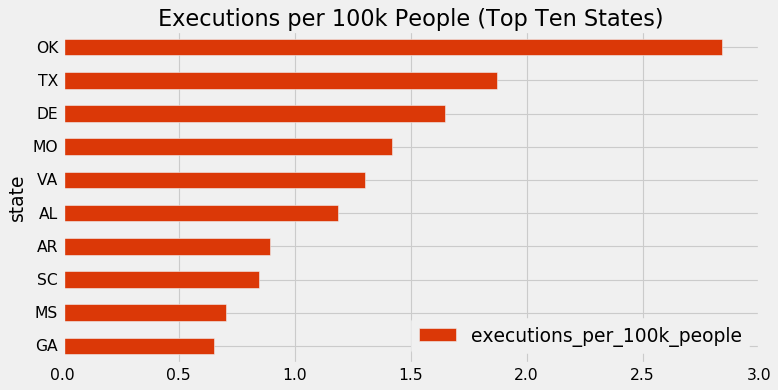

In [103]:
# Plotting the graph
ax = pop_merged_df.sort_values(by='executions_per_100k_people').tail(10).plot(x='state', y='executions_per_100k_people', kind='barh', color='#db3807', figsize=(10,5))
ax.set_title("Executions per 100k People (Top Ten States)", loc='center')

Text(0.5, 1.0, 'Total Executions (Top 10)')

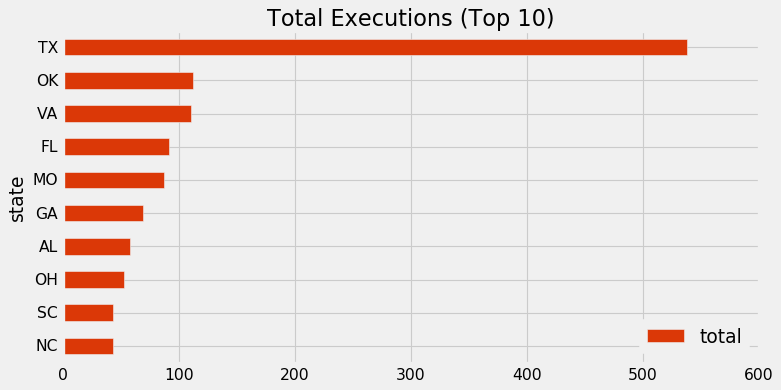

In [102]:
# Comparison plot showing how it looked before adjusting for population
s_ax = states_df.sort_values(by='total').tail(10).plot(x='state', y='total', kind='barh', color='#db3807', figsize=(10,5))
s_ax.set_title("Total Executions (Top 10)", loc='center')